<a href="https://colab.research.google.com/github/nirmitktripathii/Football_Data_analysis_ISL/blob/main/Radar_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [104]:
scrapurl = "https://understat.com/league/"
league = input("Enter League: ")


Enter League: Bundesliga


In [105]:
url = scrapurl+league
url

'https://understat.com/league/Bundesliga'

In [106]:
urlopen(url)

In [107]:
pageconnect = urlopen(url)
pageconnect

In [108]:
page_html = BeautifulSoup(pageconnect, "html.parser")
page_html

<!DOCTYPE html>

<html>
<head>
<base href="https://understat.com/"/>
<title>Bundesliga xG Table and Scorers for the 2020/2021 season | Understat.com</title>
<meta charset="utf-8"/>
<meta content="xG table of Bundesliga standings and top scorers for the 2020/2021 season, also tables from past seasons and other European football leagues." name="description"/>
<meta content="Bundesliga, xg table,scorers, expected goals table, season 2020/2021" name="Keywords"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="manifest.json" rel="manifest"/>
<link color="#5bbad5" href="safari-pinned-tab.svg" rel="mask-icon"/>
<meta content="understat" name="apple-mobile-web-app-title"/>
<meta content="understat" name="application-name"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="no-cache" http-equiv="cac

In [109]:
page_html.findAll("script")[3]

<script>
	var playersData	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x22227\x22,\x22player_name\x22\x3A\x22Robert\x20Lewandowski\x22,\x22games\x22\x3A\x2229\x22,\x22time\x22\x3A\x222467\x22,\x22goals\x22\x3A\x2241\x22,\x22xG\x22\x3A\x2232.07735199481249\x22,\x22assists\x22\x3A\x227\x22,\x22xA\x22\x3A\x224.8155501037836075\x22,\x22shots\x22\x3A\x22135\x22,\x22key_passes\x22\x3A\x2232\x22,\x22yellow_cards\x22\x3A\x224\x22,\x22red_cards\x22\x3A\x220\x22,\x22position\x22\x3A\x22F\x20S\x22,\x22team_title\x22\x3A\x22Bayern\x20Munich\x22,\x22npg\x22\x3A\x2233\x22,\x22npxG\x22\x3A\x2225.257361985743046\x22,\x22xGChain\x22\x3A\x2231.74017623066902\x22,\x22xGBuildup\x22\x3A\x225.689343474805355\x22\x7D,\x7B\x22id\x22\x3A\x226170\x22,\x22player_name\x22\x3A\x22Andr\x5Cu00e9\x20Silva\x22,\x22games\x22\x3A\x2232\x22,\x22time\x22\x3A\x222787\x22,\x22goals\x22\x3A\x2228\x22,\x22xG\x22\x3A\x2225.599147878587246\x22,\x22assists\x22\x3A\x225\x22,\x22xA\x22\x3A\x225.467086249962449\x22,\x22shots\x22\x3A\x22114

In [110]:
json_raw_string = page_html.findAll('script')[3].text

In [111]:
json_raw_string

"\n\tvar playersData\t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22227\\x22,\\x22player_name\\x22\\x3A\\x22Robert\\x20Lewandowski\\x22,\\x22games\\x22\\x3A\\x2229\\x22,\\x22time\\x22\\x3A\\x222467\\x22,\\x22goals\\x22\\x3A\\x2241\\x22,\\x22xG\\x22\\x3A\\x2232.07735199481249\\x22,\\x22assists\\x22\\x3A\\x227\\x22,\\x22xA\\x22\\x3A\\x224.8155501037836075\\x22,\\x22shots\\x22\\x3A\\x22135\\x22,\\x22key_passes\\x22\\x3A\\x2232\\x22,\\x22yellow_cards\\x22\\x3A\\x224\\x22,\\x22red_cards\\x22\\x3A\\x220\\x22,\\x22position\\x22\\x3A\\x22F\\x20S\\x22,\\x22team_title\\x22\\x3A\\x22Bayern\\x20Munich\\x22,\\x22npg\\x22\\x3A\\x2233\\x22,\\x22npxG\\x22\\x3A\\x2225.257361985743046\\x22,\\x22xGChain\\x22\\x3A\\x2231.74017623066902\\x22,\\x22xGBuildup\\x22\\x3A\\x225.689343474805355\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x226170\\x22,\\x22player_name\\x22\\x3A\\x22Andr\\x5Cu00e9\\x20Silva\\x22,\\x22games\\x22\\x3A\\x2232\\x22,\\x22time\\x22\\x3A\\x222787\\x22,\\x22goals\\x22\\x3A\\x2228\\x22,\\x22xG\\x22\\

In [112]:
istart = json_raw_string.index("(")+2
iend = json_raw_string.index("')")


In [113]:
istart

32

In [114]:
iend

315827

In [115]:
json_raw_string = json_raw_string[istart:iend]
json_raw_string

'\\x5B\\x7B\\x22id\\x22\\x3A\\x22227\\x22,\\x22player_name\\x22\\x3A\\x22Robert\\x20Lewandowski\\x22,\\x22games\\x22\\x3A\\x2229\\x22,\\x22time\\x22\\x3A\\x222467\\x22,\\x22goals\\x22\\x3A\\x2241\\x22,\\x22xG\\x22\\x3A\\x2232.07735199481249\\x22,\\x22assists\\x22\\x3A\\x227\\x22,\\x22xA\\x22\\x3A\\x224.8155501037836075\\x22,\\x22shots\\x22\\x3A\\x22135\\x22,\\x22key_passes\\x22\\x3A\\x2232\\x22,\\x22yellow_cards\\x22\\x3A\\x224\\x22,\\x22red_cards\\x22\\x3A\\x220\\x22,\\x22position\\x22\\x3A\\x22F\\x20S\\x22,\\x22team_title\\x22\\x3A\\x22Bayern\\x20Munich\\x22,\\x22npg\\x22\\x3A\\x2233\\x22,\\x22npxG\\x22\\x3A\\x2225.257361985743046\\x22,\\x22xGChain\\x22\\x3A\\x2231.74017623066902\\x22,\\x22xGBuildup\\x22\\x3A\\x225.689343474805355\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x226170\\x22,\\x22player_name\\x22\\x3A\\x22Andr\\x5Cu00e9\\x20Silva\\x22,\\x22games\\x22\\x3A\\x2232\\x22,\\x22time\\x22\\x3A\\x222787\\x22,\\x22goals\\x22\\x3A\\x2228\\x22,\\x22xG\\x22\\x3A\\x2225.599147878587246\\x22,\\x

In [116]:
json_data_Bundesliga = json_raw_string.encode("utf-8").decode("unicode escape")
json_data_Bundesliga

'[{"id":"227","player_name":"Robert Lewandowski","games":"29","time":"2467","goals":"41","xG":"32.07735199481249","assists":"7","xA":"4.8155501037836075","shots":"135","key_passes":"32","yellow_cards":"4","red_cards":"0","position":"F S","team_title":"Bayern Munich","npg":"33","npxG":"25.257361985743046","xGChain":"31.74017623066902","xGBuildup":"5.689343474805355"},{"id":"6170","player_name":"Andr\\u00e9 Silva","games":"32","time":"2787","goals":"28","xG":"25.599147878587246","assists":"5","xA":"5.467086249962449","shots":"114","key_passes":"31","yellow_cards":"1","red_cards":"0","position":"F","team_title":"Eintracht Frankfurt","npg":"21","npxG":"20.2947915866971","xGChain":"26.746570186689496","xGBuildup":"4.096429200842977"},{"id":"8260","player_name":"Erling Haaland","games":"28","time":"2416","goals":"27","xG":"23.57054380327463","assists":"6","xA":"4.035449907183647","shots":"92","key_passes":"27","yellow_cards":"2","red_cards":"0","position":"F S","team_title":"Borussia Dortmun

In [117]:
json.loads(json_data_Bundesliga).__len__()

496

In [118]:
df_Bundesliga = pd.json_normalize(json.loads(json_data_Bundesliga))

In [119]:
df_Bundesliga

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,227,Robert Lewandowski,29,2467,41,32.07735199481249,7,4.8155501037836075,135,32,4,0,F S,Bayern Munich,33,25.257361985743046,31.74017623066902,5.689343474805355
1,6170,André Silva,32,2787,28,25.599147878587246,5,5.467086249962449,114,31,1,0,F,Eintracht Frankfurt,21,20.2947915866971,26.746570186689496,4.096429200842977
2,8260,Erling Haaland,28,2416,27,23.57054380327463,6,4.035449907183647,92,27,2,0,F S,Borussia Dortmund,25,20.53943706303835,27.197274826467037,5.896184146404266
3,956,Andrej Kramaric,28,2386,20,15.525607608258724,5,4.072423195466399,95,38,2,0,F M S,Hoffenheim,15,11.736724071204662,18.05768978781998,5.372288113459945
4,7052,Wout Weghorst,34,2954,20,18.31038965843618,8,5.427308417856693,93,45,3,0,F S,Wolfsburg,18,16.03705950640142,24.294339487329125,5.954851500689983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,9494,Mohamed Sankoh,1,15,0,0,0,0,0,0,0,0,S,VfB Stuttgart,0,0,0,0
492,9507,Jimmy Adrian Kaparos,1,15,0,0,0,0,0,0,0,0,S,Schalke 04,0,0,0,0
493,9528,Marten Winkler,1,1,0,0,0,0,0,0,0,0,S,Hertha Berlin,0,0,0,0
494,9529,Henning Matriciani,1,21,0,0,0,0,0,0,0,0,S,Schalke 04,0,0,0,0


In [120]:
print(df_Bundesliga.columns)

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')


In [121]:
S1 = input("Enter Striker 1: ")
S2 = input("Enter Striker 2: ")

Enter Striker 1: Harry Kane
Enter Striker 2: Robert Lewandowski


In [142]:
df_combin = pd.concat([df_EPL, df_Bundesliga], ignore_index= True)
df = df_combin[(df_combin['player_name'] == S1) | (df_combin['player_name'] == S2)]
print(df_combin)
print(df)        

        id           player_name  ...             xGChain          xGBuildup
0      647            Harry Kane  ...  24.995648321695626  4.451256847940385
1     1250         Mohamed Salah  ...  28.968233548104763  9.800235655158758
2     1228       Bruno Fernandes  ...  26.911412378773093  11.93228487111628
3      453         Son Heung-Min  ...    20.6719155497849  6.608751138672233
4      822       Patrick Bamford  ...  23.394952706992626  4.131795546039939
...    ...                   ...  ...                 ...                ...
1015  9494        Mohamed Sankoh  ...                   0                  0
1016  9507  Jimmy Adrian Kaparos  ...                   0                  0
1017  9528        Marten Winkler  ...                   0                  0
1018  9529    Henning Matriciani  ...                   0                  0
1019  9547  Jonas Michel Dirkner  ...                   0                  0

[1020 rows x 18 columns]
      id         player_name  ...             xGCh

In [164]:
df

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,647,Harry Kane,35,3097,23,22.174858909100294,14,7.577093588188291,138,49,1,0,F,Tottenham,19,19.130183439701796,24.995648321695626,4.451256847940385
524,227,Robert Lewandowski,29,2467,41,32.07735199481249,7,4.8155501037836075,135,32,4,0,F S,Bayern Munich,33,25.257361985743046,31.74017623066902,5.689343474805355


In [143]:
df_params = df[['goals','assists','shots','xG','xA','npg','npxG','xGChain','xGBuildup']]
df_params = df_params.astype(float)
df_params

,goals,assists,shots,xG,xA,npg,npxG,xGChain,xGBuildup
0,23.0,14.0,138.0,22.174859,7.577094,19.0,19.130183,24.995648,4.451257
524,41.0,7.0,135.0,32.077352,4.815550,33.0,25.257362,31.740176,5.689343


In [144]:
#get parameters
params = list(df_params.columns)
params

['goals',
 'assists',
 'shots',
 'xG',
 'xA',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup']

In [156]:

df['team_title'][0]

'Tottenham'

In [157]:
#Add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
  a = min(df_params[params][x])
  a = 0.75*a
  
  b = max(df_params[params][x])
  b = 1.25*b

  ranges.append((a,b))

for i,x in df_params.iterrows():
  if df['player_name'][i] == S1:
    t1 = df['team_title'][i]
    a_values = df_params.loc[i].values.tolist()
  if df['player_name'][i] == S2:
    t2 = df['team_title'][i]
    b_values = df_params.loc[i].values.tolist() 
values = [a_values, b_values]
print([t1,t2])


['Tottenham', 'Bayern Munich']


In [158]:
a_values

[23.0,
 14.0,
 138.0,
 22.174858909100294,
 7.577093588188291,
 19.0,
 19.130183439701796,
 24.995648321695626,
 4.451256847940385]

In [159]:
b_values

[41.0,
 7.0,
 135.0,
 32.07735199481249,
 4.8155501037836075,
 33.0,
 25.257361985743046,
 31.74017623066902,
 5.689343474805355]

In [160]:
ranges

[(17.25, 51.25),
 (5.25, 17.5),
 (101.25, 172.5),
 (16.63114418182522, 40.09668999351561),
 (3.6116625778377056, 9.471366985235363),
 (14.25, 41.25),
 (14.347637579776347, 31.571702482178807),
 (18.74673624127172, 39.67522028833628),
 (3.338442635955289, 7.111679343506694)]

In [161]:
values

[[23.0,
  14.0,
  138.0,
  22.174858909100294,
  7.577093588188291,
  19.0,
  19.130183439701796,
  24.995648321695626,
  4.451256847940385],
 [41.0,
  7.0,
  135.0,
  32.07735199481249,
  4.8155501037836075,
  33.0,
  25.257361985743046,
  31.74017623066902,
  5.689343474805355]]

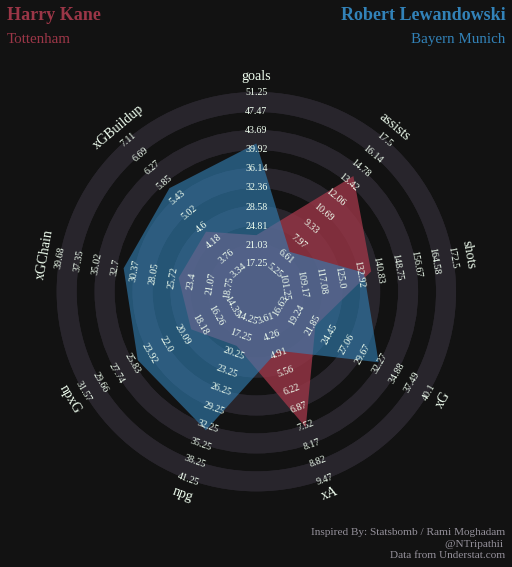

In [163]:
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

#title

title = dict(
    title_name = S1,
    title_color = '#9B3647',
    subtitle_name = t1,
    subtitle_color = '#9B3647',
    title_name_2 = S2,
    title_color_2 = '#3282b8',
    subtitle_name_2 = t2,
    subtitle_color_2 = '#3282b8',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@NTripathii \nData from Understat.com'
radar = Radar(label_fontsize= 14, range_fontsize= 10, background_color="#121212", patch_color="#28252C", label_color="#F0FFF0",
              range_color="#F0FFF0")
fig,ax = radar.plot_radar(ranges =  ranges, params = params, values = values,
                          radar_color = ['#9B3647', '#3282b8'], 
                          alphas = [0.8,0.6], title = title, endnote = endnote,
                          end_size = 11.3, compare = True)